In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv('./Data/Mall_customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [5]:
data.size

1000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe(include='all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [7]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

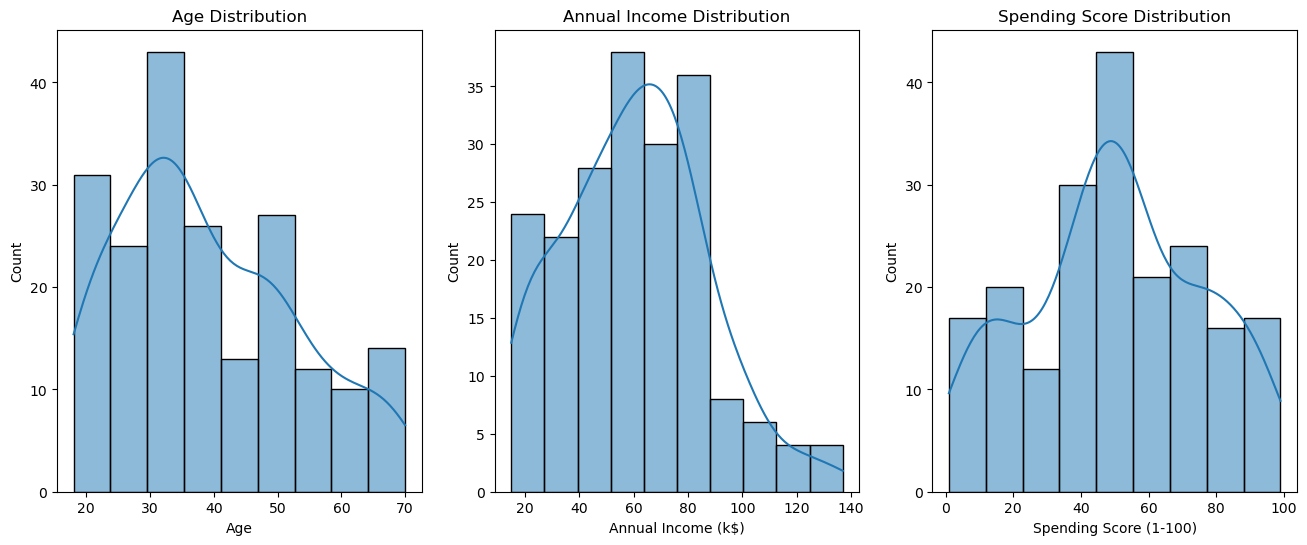

In [9]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.histplot(data['Age'],kde = True)
plt.title('Age Distribution')

plt.subplot(1,3,2)
sns.histplot(data['Annual Income (k$)'],kde = True)
plt.title('Annual Income Distribution')

plt.subplot(1,3,3)
sns.histplot(data['Spending Score (1-100)'],kde = True)
plt.title('Spending Score Distribution')

plt.show()

In [21]:
data_encoded = pd.get_dummies(data)
data_encoded.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False


Text(0.5, 1.0, 'Correlation matrix')

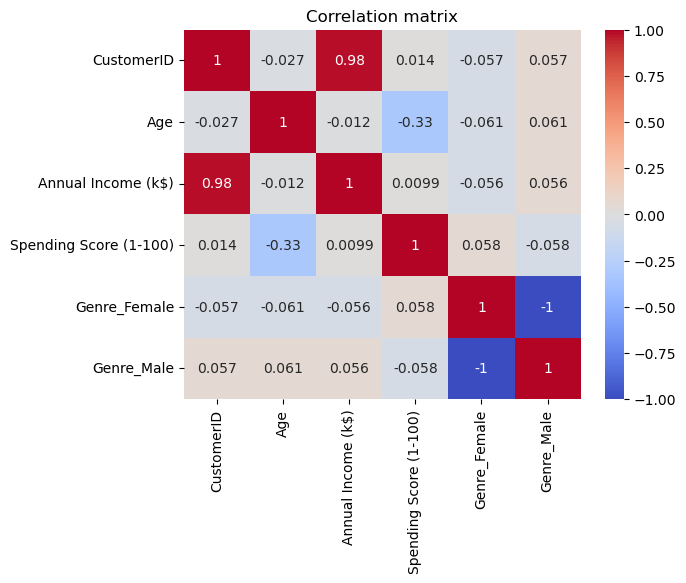

In [22]:
corr_matrix = data_encoded.corr()

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation matrix')

/Users/kiranpaudel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


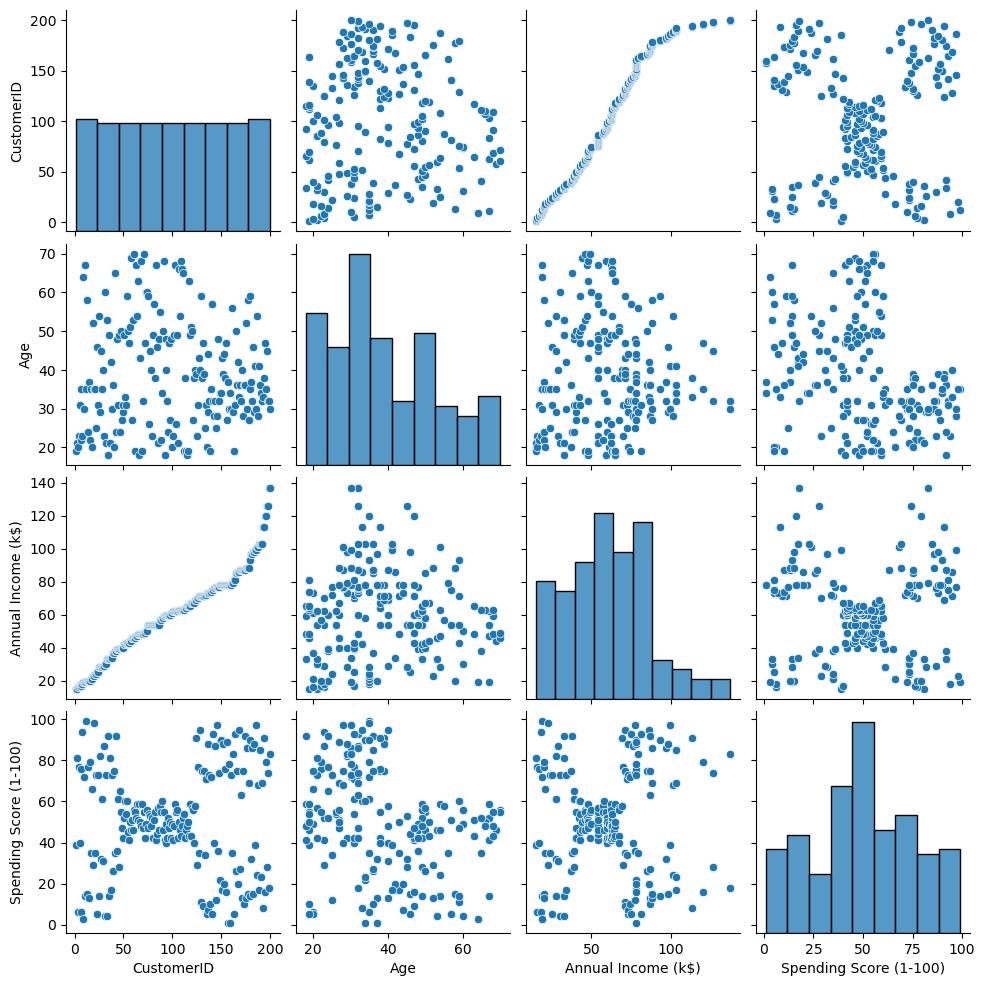

In [11]:
sns.pairplot(data);

In [12]:
x = data[['Annual Income (k$)','Spending Score (1-100)']]
kmeans = KMeans(n_clusters= 5,random_state=42)
kmeans.fit(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [13]:
# Define colors for each cluster
cluster_colors = {0: 'purple', 1: 'green', 2: 'blue', 3: 'orange', 4: 'brown'}
data['Color'] = data['Cluster'].map(cluster_colors)

# Define cluster names
cluster_names = [
    'Cluster 0: Moderate Income, Moderate Spending',
    'Cluster 1: High Income, High Spending',
    'Cluster 2: Low Income, Low Spending',
    'Cluster 3: Low Income, High Spending',
    'Cluster 4: High Income, Low Spending'
]

# Visualize the clusters with annotations
plt.figure(figsize=(10, 6))
for cluster in range(5):
    clustered_data = data[data['Cluster'] == cluster]
    plt.scatter(clustered_data['Annual Income (k$)'], clustered_data['Spending Score (1-100)'], 
                color=cluster_colors[cluster], label=cluster_names[cluster], s=100)

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

KeyError: 'Cluster'